# Digit Recognizer
Kaggle: https://www.kaggle.com/competitions/digit-recognizer/data

Algorithms that have been tried on it and their levels of success, can be found at http://yann.lecun.com/exdb/mnist/index.html.

Ref: https://mks.tw/2880/數據分析-踏上-kaggle-之路-使用-knn-預測-digit-recognizer

# Data Observation and Preparation
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

(42000, 785)
(42000,)
(42000, 784)
(28, 28)
The first number is 1


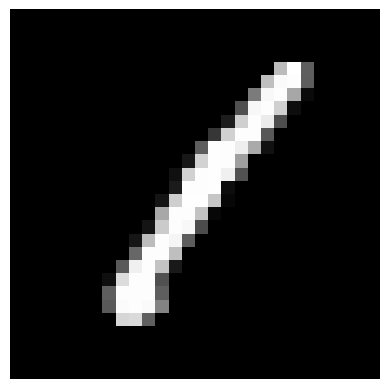

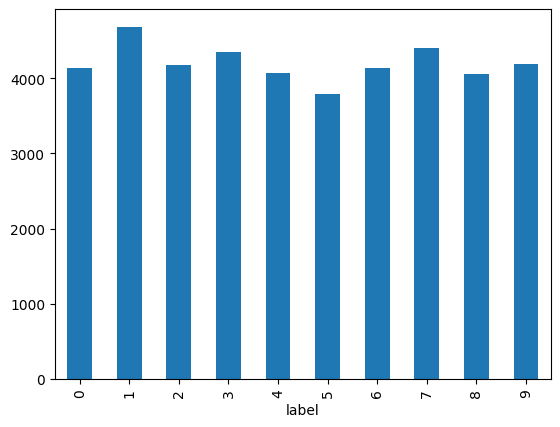

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
TrainData = pd.read_csv('input/train.csv')
print(TrainData.shape)

# Split data into x and y
Train_y = TrainData.iloc[:,0] # iloc is a method to select rows and columns from a DataFrame by their integer index positions.
print(Train_y.shape)
Train_x = TrainData.iloc[:,1:] 
print(Train_x.shape)

# try to plt the first number 
first_num = Train_x.iloc[0,:]
first_num = first_num.values.reshape(28, 28)
print(first_num.shape)
print(f'The first number is {Train_y.iloc[0]}')
plt.imshow(first_num, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

# observe the data detribution
val_count = Train_y.value_counts().sort_index()  # Sort by index (digit label)
val_count.plot(kind='bar')
plt.show()

# Feature Engineering
Thresholding, create binary images from grayscale images

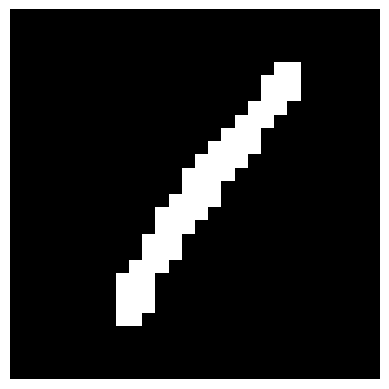

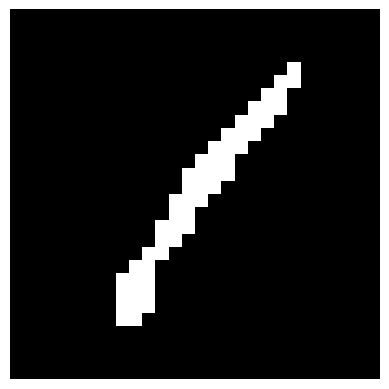

/var/folders/fg/s5pkl46s33j3w7stxvvmkxvh0000gn/T/ipykernel_1495/1855617327.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_x.loc[index] = binary_row


The output is showing 0


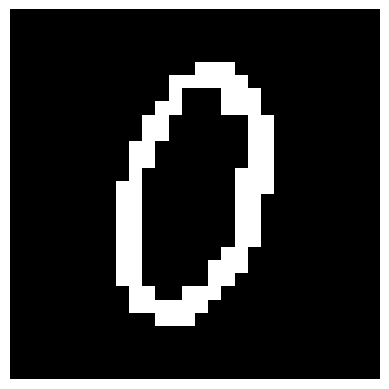

In [19]:
import numpy as np

# find the better threshold by using the first data as comparison
test1 = Train_x.iloc[0,:].copy()
test2 = Train_x.iloc[0,:].copy()

threshold = 150 
test1 = np.where(test1 > threshold, 255, 0)
test1 = test1.reshape(28, 28)
plt.imshow(test1, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()

threshold = 200 
test2 = np.where(test2 > threshold, 255, 0)
test2 = test2.reshape(28, 28)
plt.imshow(test2, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()


# 150 seems to be better, let's use 150 as our threshold
threshold = 150 
for index, row in Train_x.iterrows(): # index: The index label of the row. row: A pandas Series object representing the data in that row.
    # Apply thresholding to each pixel in the row
    binary_row = np.where(row > threshold, 255, 0)
    # Update the row in Train_x with the binary values
    Train_x.loc[index] = binary_row

# try to plt the random number 
test_num = Train_x.iloc[5,:]
test_num = test_num.values.reshape(28, 28)
print(f'The output is showing {Train_y[5]}')
plt.imshow(test_num, cmap='gray', vmin=0, vmax=255)
plt.axis('off') 
plt.show()

CNN seems to perform the best